# Случайные процессы

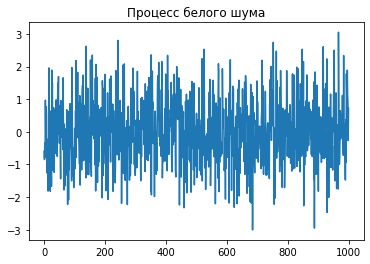

In [1]:
import math
import warnings
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve
from statsmodels.api import graphics


N = 1000
X = np.random.normal(size=N)

plt.plot(X)
plt.title('Процесс белого шума')
plt.show()

$$ K(\tau) = De^{-\alpha|\tau|}(1+\alpha|\tau|) $$

In [2]:
alpha = 1
n = 15
tau = .5

autocorrelation = lambda tau: np.exp(-alpha * abs(tau)) * (1 + alpha * abs(tau))

def equation(c):
    R = [autocorrelation(tau * i) for i in range(0, n)]
    a = np.array([[c[j] for j in range(i, n)] + [0] * i for i in range(n)])
    b = np.array([c[i] for i in range(n)])
    res = np.dot(a, b)
    return [row - R[i] for i, row in enumerate(res)]

warnings.filterwarnings('ignore', 'The iteration is not making good progress')

C = fsolve(equation, [1 for _ in range(n)])

u = [sum([C[j] * X[i - j] for j in range(n)]) for i in range(n - 1, N)]

## Статистические исследования

M = 0.0363970453256774 D = 0.9698926980304405


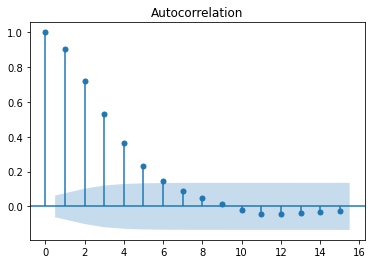

In [3]:
M = sum(u) / len(u)
D = sum([u[i] ** 2 for i in range(len(u))]) / len(u) - M ** 2

print('M =', M, 'D =', D)

graphics.tsa.plot_acf(u, lags=n)
plt.show()